In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_palette('pastel')
sns.set_style('darkgrid')

In [3]:
water = pd.read_csv('water_potability.csv')
water.head()

,pH,TDS,Chlorine,Chemical_Oxygen,Conductivity,Organic_Carbon,Turbidity,Potability
0,NaN,20791.31898,7.300212,368.516441,564.308654,10.379783,2.963135,0
1,3.716080,18630.05786,6.635246,NaN,592.885359,15.180013,4.500656,0
2,8.099124,19909.54173,9.275884,NaN,418.606213,16.868637,3.055934,0
3,8.316766,22018.41744,8.059332,356.886136,363.266516,18.436525,4.628771,0
4,9.092223,17978.98634,6.546600,310.135738,398.410813,11.558279,4.075075,0


In [4]:
water.isnull().values.any()

True

In [5]:
water.isnull().sum()

pH                 491
TDS                  0
Chlorine             0
Chemical_Oxygen    781
Conductivity         0
Organic_Carbon       0
Turbidity            0
Potability           0
dtype: int64

In [6]:
water.dropna(inplace =True)

In [7]:
water.head()

,pH,TDS,Chlorine,Chemical_Oxygen,Conductivity,Organic_Carbon,Turbidity,Potability
3,8.316766,22018.41744,8.059332,356.886136,363.266516,18.436525,4.628771,0
4,9.092223,17978.98634,6.546600,310.135738,398.410813,11.558279,4.075075,0
5,5.584087,28748.68774,7.544869,326.678363,280.467916,8.399735,2.559708,0
6,10.223862,28749.71654,7.513408,393.663395,283.651634,13.789695,2.672989,0
7,8.635849,13672.09176,4.563009,303.309771,474.607645,12.363817,4.401425,0


In [8]:
water.describe()

,pH,TDS,Chlorine,Chemical_Oxygen,Conductivity,Organic_Carbon,Turbidity,Potability
count,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000
mean,7.083824,22015.192720,7.125917,333.312912,425.979215,14.349405,3.969878,0.400284
std,1.586245,8686.584143,1.589125,41.083397,80.724078,3.315629,0.785557,0.490072
min,0.227499,320.942611,1.390871,129.000000,201.619737,2.200000,1.450000,0.000000
25%,6.089079,15666.690300,6.121864,307.706750,365.842780,12.118659,3.436360,0.000000
50%,7.027241,21041.034770,7.138343,332.477743,423.156807,14.298910,3.966109,0.000000
75%,8.064291,27353.621742,8.105680,359.267357,481.545011,16.665328,4.521985,1.000000
max,14.000000,56488.672410,13.127000,481.030642,753.342620,27.006707,6.494749,1.000000


C:\Users\zzxn9\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    1269
1     847
Name: Potability, dtype: int64


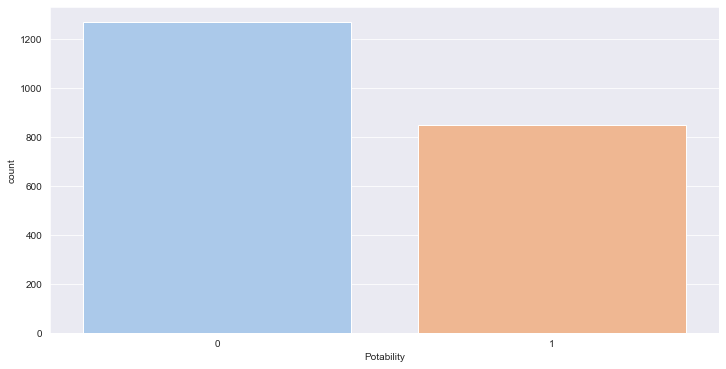

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(water['Potability'], palette='pastel')
print(water.Potability.value_counts())

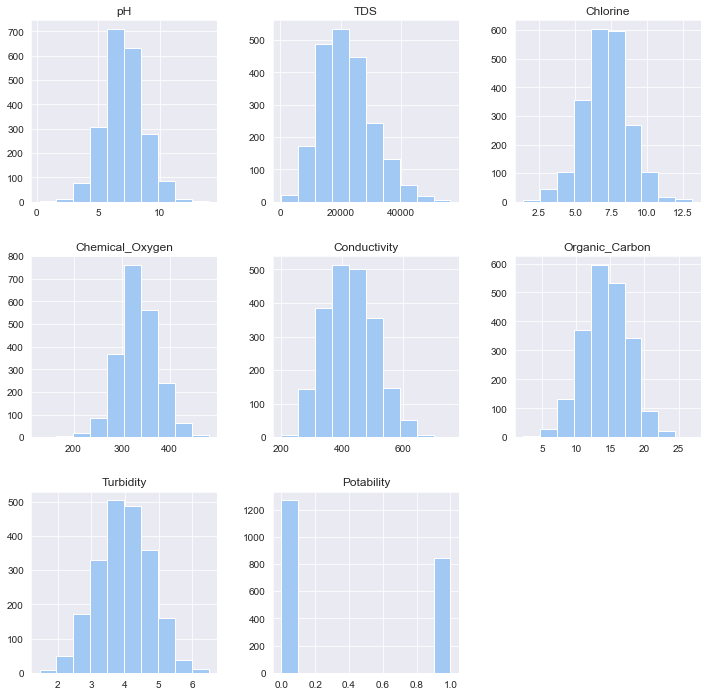

In [10]:
numbers = pd.Series(water.columns)
water[numbers].hist(figsize=(12,12))
plt.show()

<AxesSubplot:xlabel='Potability', ylabel='pH'>

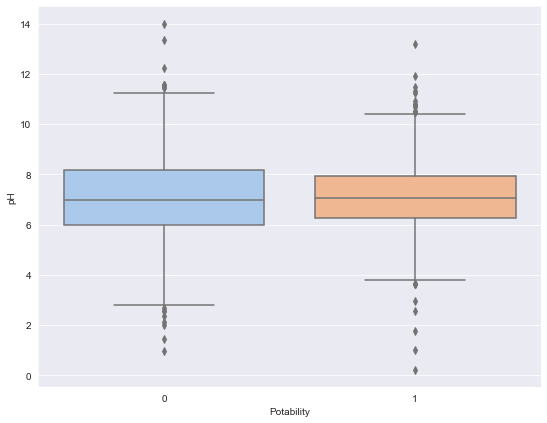

In [11]:
plt.figure(figsize=(9, 7))
sns.boxplot(x='Potability', y='pH', data=water)

<AxesSubplot:xlabel='Potability', ylabel='TDS'>

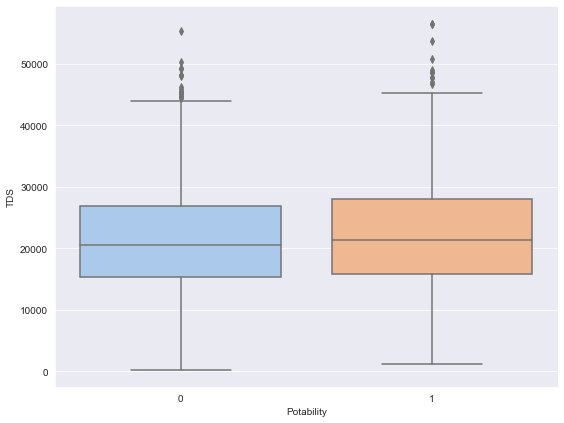

In [12]:
plt.figure(figsize=(9, 7))
sns.boxplot(x='Potability', y='TDS', data=water)

<AxesSubplot:xlabel='Potability', ylabel='Chlorine'>

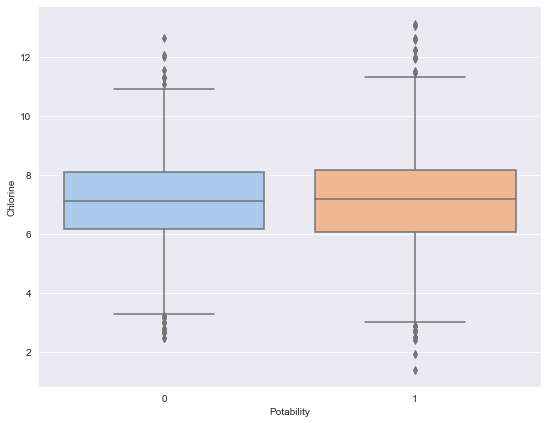

In [13]:
plt.figure(figsize=(9, 7))
sns.boxplot(x='Potability', y='Chlorine', data=water)

<AxesSubplot:xlabel='Potability', ylabel='Chemical_Oxygen'>

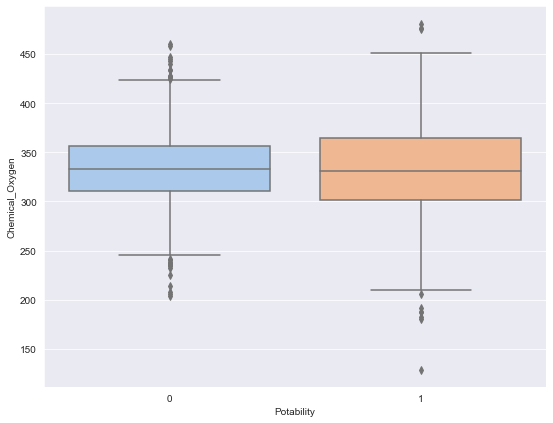

In [14]:
plt.figure(figsize=(9, 7))
sns.boxplot(x='Potability', y='Chemical_Oxygen', data=water)

<AxesSubplot:xlabel='Potability', ylabel='Conductivity'>

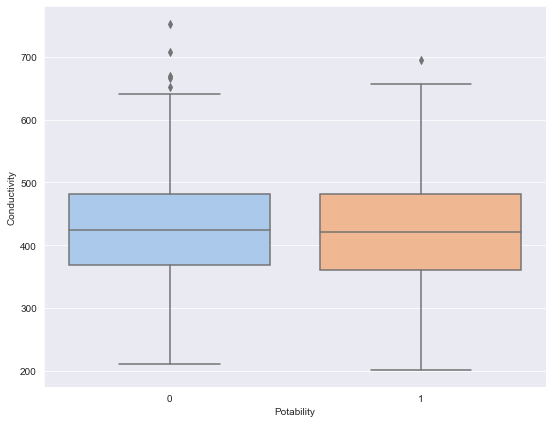

In [15]:
plt.figure(figsize=(9, 7))
sns.boxplot(x='Potability', y='Conductivity', data=water)

<AxesSubplot:xlabel='Potability', ylabel='Organic_Carbon'>

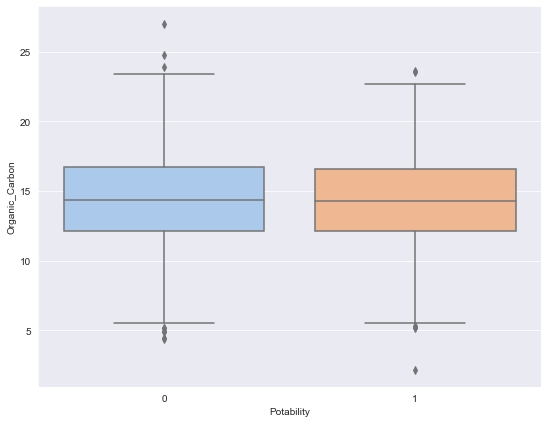

In [16]:
plt.figure(figsize=(9, 7))
sns.boxplot(x='Potability', y='Organic_Carbon', data=water)

<AxesSubplot:xlabel='Potability', ylabel='Turbidity'>

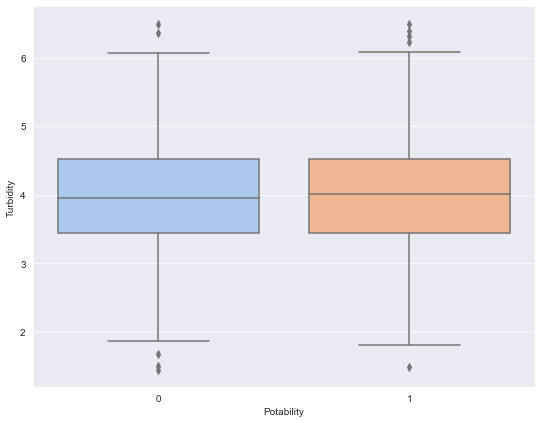

In [17]:
plt.figure(figsize=(9, 7))
sns.boxplot(x='Potability', y='Turbidity', data=water)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [19]:
X = water.drop(['Potability'], axis = 1)
y = water['Potability']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()

In [22]:
#Choosing the best parameters for Random Forest
params_rfc = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rfc = GridSearchCV(rfc, param_grid=params_rfc, cv=5, refit=True)

#Choosing the best parameters for K Nearest Neighbours
para_knn = {'n_neighbors':np.arange(1, 50)}
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5, refit=True)

In [23]:
grid_rfc.fit(X_train, y_train)

grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [24]:
print("Best parameters for Random Forest:", grid_rfc.best_params_)
print("Best parameters for KNN:", grid_knn.best_params_)

Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 350}
Best parameters for KNN: {'n_neighbors': 45}


In [25]:
rfc = RandomForestClassifier(n_estimators=350, min_samples_leaf=2)
rfc.fit(X_train, y_train)
predictions_rfc = rfc.predict(X_test)

In [26]:
knn = KNeighborsClassifier(n_neighbors=45)
knn.fit(X_train, y_train)
predictions_knn = knn.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

Predictions using Random Forest Classifier

In [28]:
print(classification_report(y_test,predictions_rfc))
print('\n')
print(confusion_matrix(y_test,predictions_rfc))

              precision    recall  f1-score   support

           0       0.66      0.87      0.75       384
           1       0.61      0.30      0.40       251

    accuracy                           0.65       635
   macro avg       0.63      0.59      0.58       635
weighted avg       0.64      0.65      0.61       635



[[335  49]
 [175  76]]


Predictions using K Nearest Neighbours

In [29]:
print(classification_report(y_test,predictions_knn))
print('\n')
print(confusion_matrix(y_test,predictions_knn))

              precision    recall  f1-score   support

           0       0.59      0.88      0.71       384
           1       0.31      0.09      0.14       251

    accuracy                           0.56       635
   macro avg       0.45      0.48      0.42       635
weighted avg       0.48      0.56      0.48       635



[[336  48]
 [229  22]]


Block Diagram of the Machine Learning Model

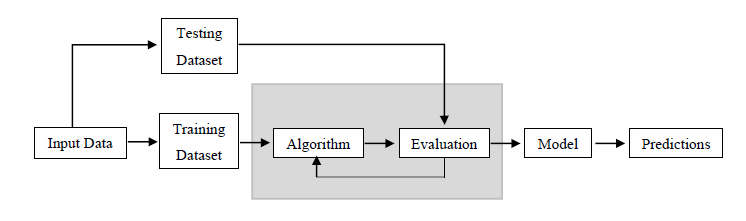

In [30]:
imp =rfc.feature_importances_
col = X.columns
rfc_cof = pd.Series(imp, col)
rfc_cof

pH                 0.173244
TDS                0.142222
Chlorine           0.143992
Chemical_Oxygen    0.176401
Conductivity       0.121093
Organic_Carbon     0.117978
Turbidity          0.125069
dtype: float64

<AxesSubplot:>

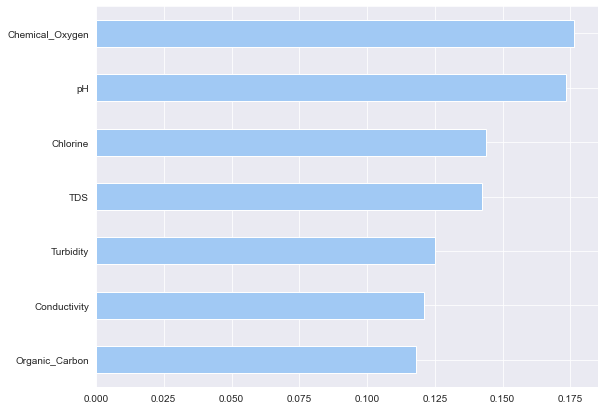

In [31]:
plt.figure(figsize=(9, 7))
rfc_cof.sort_values().plot.barh()

Testing Model

In [32]:
new_data = pd.read_csv('a.csv')
new_data

,pH,TDS,Chlorine,Chemical_Oxygen,Conductivity,Organic_Carbon,Turbidity,Potability
0,6.857494,22603.64945,6.627059,368.105783,412.434677,16.926175,4.306581,NaN
1,9.092223,17978.98634,6.546600,310.135738,398.410813,11.558279,4.075075,NaN
2,5.345887,22274.36837,9.727103,319.030495,492.135489,11.894673,2.950361,NaN
3,5.386307,40149.31656,8.124232,318.791667,355.546420,17.348802,3.662563,NaN
4,9.919478,16544.27559,7.039311,363.036851,278.753204,17.052540,4.117488,NaN
5,8.989900,15921.41202,6.297312,312.931021,390.410231,9.899115,4.613843,NaN
6,6.702547,17246.92035,7.708117,304.510230,329.266002,16.217303,3.442983,NaN
7,11.491011,37188.82602,9.263166,258.930600,439.893618,16.172755,4.369264,NaN
8,6.069616,26138.78019,7.747547,345.700257,415.886955,12.067620,3.669712,NaN
9,4.668102,47580.99160,7.166639,359.948574,526.424171,13.894419,4.435821,NaN


In [33]:
new_input = new_data.drop(['Potability'], axis = 1)
new_output = new_data['Potability']

In [34]:
new_output = rfc.predict(new_input)

In [35]:
print(new_output)

[1 0 0 0 0 1 1 1 1 1]


In [36]:
new_data['Potability'] = new_output
new_data

,pH,TDS,Chlorine,Chemical_Oxygen,Conductivity,Organic_Carbon,Turbidity,Potability
0,6.857494,22603.64945,6.627059,368.105783,412.434677,16.926175,4.306581,1
1,9.092223,17978.98634,6.546600,310.135738,398.410813,11.558279,4.075075,0
2,5.345887,22274.36837,9.727103,319.030495,492.135489,11.894673,2.950361,0
3,5.386307,40149.31656,8.124232,318.791667,355.546420,17.348802,3.662563,0
4,9.919478,16544.27559,7.039311,363.036851,278.753204,17.052540,4.117488,0
5,8.989900,15921.41202,6.297312,312.931021,390.410231,9.899115,4.613843,1
6,6.702547,17246.92035,7.708117,304.510230,329.266002,16.217303,3.442983,1
7,11.491011,37188.82602,9.263166,258.930600,439.893618,16.172755,4.369264,1
8,6.069616,26138.78019,7.747547,345.700257,415.886955,12.067620,3.669712,1
9,4.668102,47580.99160,7.166639,359.948574,526.424171,13.894419,4.435821,1


Input real data from sensors

In [37]:
newdata1 = pd.read_csv('Input data.csv')
newdata1.head()

,pH,TDS,Chlorine,Chemical_Oxygen,Conductivity,Organic_Carbon,Turbidity,Potability
0,8.5,3724.0,7.73,368.99,5378.0,3.63,13.10,NaN
1,8.2,3665.0,6.61,368.99,5321.0,3.63,13.10,NaN
2,7.5,3724.0,6.61,368.99,516.0,3.63,13.10,NaN
3,5.5,638.0,9.24,368.99,348.0,3.63,13.10,NaN
4,6.8,635.0,9.24,368.99,372.0,3.63,11.52,NaN


In [38]:
new_input = newdata1.drop(['Potability'], axis = 1)
new_output = newdata1['Potability']

In [39]:
new_output = rfc.predict(new_input)

In [40]:
print(new_output)

[0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1
 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1]


In [41]:
newdata1['Potability'] = new_output
newdata1.head(20)

,pH,TDS,Chlorine,Chemical_Oxygen,Conductivity,Organic_Carbon,Turbidity,Potability
0,8.5,3724.0,7.73,368.99,5378.0,3.63,13.10,0
1,8.2,3665.0,6.61,368.99,5321.0,3.63,13.10,0
2,7.5,3724.0,6.61,368.99,516.0,3.63,13.10,0
3,5.5,638.0,9.24,368.99,348.0,3.63,13.10,1
4,6.8,635.0,9.24,368.99,372.0,3.63,11.52,0
5,5.7,361.0,7.73,312.21,360.0,4.11,11.83,1
6,5.7,243.0,7.73,312.21,168.0,2.95,11.83,1
7,7.8,7.0,9.53,312.21,5467.0,4.31,11.83,1
8,7.8,114.0,9.53,319.55,550.0,2.95,11.51,0
9,8.5,16.0,9.74,359.22,372.0,4.07,11.51,0
